# Homework #8. Dimesionality Reduction

## Task 1

##### Можно ли отобрать наиболее значимые признаки с помощью PCA?

Цель анализа главных компонентов в том, чтобы уменьшить размерность данных, при этом потеряв как можно меньше информации. Получается, с помощью PCA можно отобрать те признаки, которые имеют наиболее выраженное влияние на целевую переменную.

# Self-study #8. Summation

## Task 1

(*) Написать свою реализацию метода главных компонент с помощью сингулярного разложения с использованием функции numpy.linalg.svd()

In [398]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

#### Связь PCA и SVD
$X = UDV^T$
$$$$
$ Cov(X) = XX^T = (UD V^T)^T(U D V^T) $, $ U^TU = 1, D^TD = \Lambda $   =>  $ Cov(X) = V\Lambda V^T$
$$$$
$$$$
$Z = XW = XV = UDV^TV = UD $

In [4]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.std = None
        
    def fit(self, X):
        X_ = X.astype(float)
        
        self.mean = np.mean(X_, axis=0)

        X_ -= self.mean

        self.std = np.std(X_, axis=0)
        X_ /= self.std
                
        # Сингулярное разложение матрицы ковариации
        U, D, VT = np.linalg.svd(X_)
        m, n = X_.shape
        sigma = np.zeros((m, n))
        for i in range(min(m, n)):
            sigma[i, i] = D[i]

        lambdas = sigma.T.dot(sigma)
        covariance_matrix = VT.T.dot(lambdas.dot(VT))
        
        eigvals, eigvecs = np.linalg.eig(covariance_matrix)
        
        eigvecs = eigvecs.T
        idxs = np.argsort(eigvals)[::-1]
        eigvals = eigvals[idxs]
        eigvecs = eigvecs[idxs]
        
        self.components = eigvecs[0:self.n_components]
    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components.T)

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


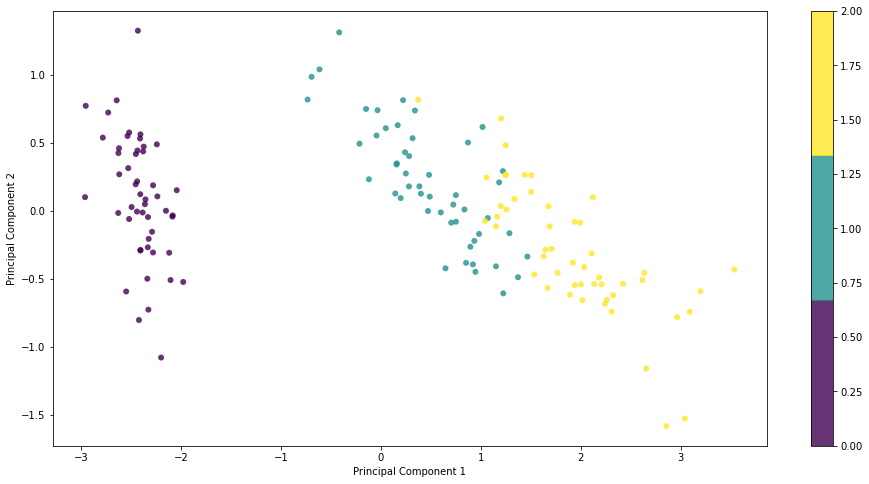

In [401]:
data = datasets.load_iris()
X, y = data.data, data.target

pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

print(f'Shape of X: {X.shape}')
print(f'Shape of transformed X: {X_projected.shape}')

x1, x2 = X_projected[:, 0], X_projected[:, 1]

plt.figure(figsize=(16, 8))
plt.scatter(x1, x2, c=y, edgecolor='none', alpha=0.8, cmap=plt.cm.get_cmap('viridis', 3))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

Поправьте, если что не так, пожалуйста. 

## Task 2

(*) Обучить любую модель классификации на датасете IRIS до применения PCA и после него. Сравнить качество классификации по отложенной выборке.

In [404]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

classifier = KNeighborsClassifier(n_neighbors=3)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + '%')

Accuracy of our model is equal 96.67%


In [405]:
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_projected, y, test_size = 0.2, random_state = 0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + '%')

Accuracy of our model is equal 90.0%
